In [82]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
from geopy.geocoders import Nominatim
import numpy as np
from shapely.geometry import Point, Polygon
import json
df = pd.read_csv('../../../data/kc_house_data.csv')
with open('../../../data/Consolidated_Demographics_Index_for_King_County_Census_Tracts___demographic_index_area.geojson') as f:
    census_tract = json.load(f)

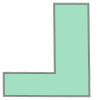

In [83]:
Polygon(census_tract['features'][0]['geometry']['coordinates'][0])

In [84]:
# coords = []

# for x in census_tract['features']:
#     d = {}
#     d['label'] = x['properties']['TRACT_LBL']
#     if len(x['geometry']['coordinates']) == 1:
#         d['shape'] = Polygon(x['geometry']['coordinates'][0])
#     coords.append(d)

In [85]:
coords2 = []

for x in census_tract['features']:
    d = {}
    d['label'] = x['properties']['TRACT_LBL']
    shape = x['geometry']['coordinates']
    if len(shape) != 1:
        d['shape'] = Polygon(shape[0][0]+shape[1][0])
    else:
        d["shape"] = Polygon(shape[0])
    coords2.append(d)

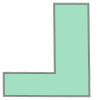

In [87]:
coords[0]['shape']

In [88]:
coords2[0:20]

[{'label': 'Tract 001701',
  'shape': <shapely.geometry.polygon.Polygon at 0x7f8a36593490>},
 {'label': 'Tract 001702',
  'shape': <shapely.geometry.polygon.Polygon at 0x7f8a36593850>},
 {'label': 'Tract 001800',
  'shape': <shapely.geometry.polygon.Polygon at 0x7f8a365932b0>},
 {'label': 'Tract 001600',
  'shape': <shapely.geometry.polygon.Polygon at 0x7f8a365932e0>},
 {'label': 'Tract 001500',
  'shape': <shapely.geometry.polygon.Polygon at 0x7f8a36593580>},
 {'label': 'Tract 001400',
  'shape': <shapely.geometry.polygon.Polygon at 0x7f8a36593070>},
 {'label': 'Tract 001300',
  'shape': <shapely.geometry.polygon.Polygon at 0x7f8a36593400>},
 {'label': 'Tract 001200',
  'shape': <shapely.geometry.polygon.Polygon at 0x7f8a36593190>},
 {'label': 'Tract 001900',
  'shape': <shapely.geometry.polygon.Polygon at 0x7f8a36593310>},
 {'label': 'Tract 002600',
  'shape': <shapely.geometry.polygon.Polygon at 0x7f8a36593520>},
 {'label': 'Tract 002000',
  'shape': <shapely.geometry.polygon.Polygo

In [65]:
# long = df.iloc[0]['long']
# lat = df.iloc[0]['lat']
# point = Point(long, lat)

# coords2[0]['shape'].within(point)

In [66]:
coords2[-1]

{'label': 'Tract 032327',
 'shape': <shapely.geometry.polygon.Polygon at 0x7f8a365930a0>}

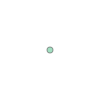

In [67]:
point

In [94]:
# coord_shapes = []
# for coord in coords:
#     if len(coord) >= 2:
#         coord_shapes.append(coord)
# coord_shapes[:2]

[{'label': 'Tract 001701',
  'shape': <shapely.geometry.polygon.Polygon at 0x7f8a2ef8b760>},
 {'label': 'Tract 001702',
  'shape': <shapely.geometry.polygon.Polygon at 0x7f8a2ef8be50>}]

In [96]:
# long = df.iloc[1]['long']
# lat = df.iloc[1]['lat']
# point = Point(long, lat)
# point_list = []

# for home in df:
#     point_list.apppend(Point(df.iloc[home]['long'], df.iloc[home]['lat']))

In [97]:
df.coordinates = list(zip(df.long, df.lat))

<ipython-input-97-4db589e91429>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.coordinates = list(zip(df.long, df.lat))


In [98]:
df.coordinates[0:3]

[(-122.257, 47.5112),
 (-122.319, 47.721000000000004),
 (-122.23299999999999, 47.7379)]

In [72]:
tracts = []
for coordinate in df.coordinates:
    point = Point(coordinate)
    found = False
    for x in coords2:
        if x['shape'].contains(point):
            tracts.append(x['label'])
            found = True
            
    if not found:
        tracts.append(0)
        

In [73]:
len(tracts)

21597

In [74]:
df['tracts'] = tracts

In [21]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,tracts
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,Tract 011900
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,Tract 000200
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,Tract 022102
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,Tract 011600
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,Tract 032317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,Tract 001300
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,Tract 026600
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,Tract 008900
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,Tract 025006


In [22]:
df.to_csv('housing_data.csv')